In [1]:
import numpy as np
pi=np.pi
def sin(t):
    return(np.round(np.sin(t/180*pi),9))
def cos(t):
    return(np.round(np.cos(t/180*pi),9))
def ten(t):
    return(np.round(np.tan(t/180*pi),9))
def atan2(x,y):
    return(round(np.arctan2(x,y)*180/pi,5))
def P3(x,y,z):#位置矢量
    return(np.mat([[x],[y],[z]]))
def P4(x,y,z):#位置矢量
    return(np.mat([[x],[y],[z],[1]]))
def DQ(x,y,z):#平移算式
    return(np.mat([[1,0,0,x],
                     [0,1,0,y],
                     [0,0,1,z],
                     [0,0,0,1]],dtype='float'))
def Rx(t):#X旋轉
    return(np.mat([[1,0,0],
                     [0,cos(t),-sin(t)],
                     [0,sin(t),cos(t)]]))
def Ry(t):#Y旋轉
    return(np.mat([[cos(t),0,sin(t)],
                     [0,1,0],
                     [-sin(t),0,cos(t)]]))
def Rz(t):#Z旋轉
    return(np.mat([[cos(t),-sin(t),0],
                     [sin(t),cos(t),0],
                     [0,0,1]]))  
def R(r11,r12,r13,r21,r22,r23,r31,r32,r33):#平移算式
    return(np.mat([[r11,r12,r13],
                     [r21,r22,r23],
                     [r31,r32,r33]]))
def T(r,dq):#一般變換!!!
    dq[0:3,0:3]=r
    return(dq)
def Tt(r,p):#逆變換!!!
    p=-r.T*p
    return(np.vstack((np.hstack((r.T,p)),[0,0,0,1])))
def Rxyz(r,b,a):#XYZ固定角
    return(np.mat([[cos(a)*cos(b),cos(a)*sin(b)*sin(r)-sin(a)*cos(r),cos(a)*sin(b)*cos(r)+sin(a)*sin(r)],
                     [sin(a)*cos(b),sin(a)*sin(b)*sin(r)+cos(a)*cos(r),sin(a)*sin(b)*cos(r)-cos(a)*sin(r)],
                     [-sin(b),cos(b)*sin(r),cos(b)*cos(r)]]))
def Rzyz(r,b,a):#ZYZ歐拉角
    return(np.mat([[cos(a)*cos(b)*cos(r)-sin(a)*sin(r),-cos(a)*cos(b)*sin(r)-sin(a)*cos(r),cos(a)*sin(b)],
                     [sin(a)*cos(b)*cos(r)+cos(a)*sin(r),-sin(a)*cos(b)*sin(r)+cos(a)*cos(r),sin(a)*sin(b)],
                     [-sin(b)*cos(r),sin(b)*sin(r),cos(b)]]))                     
def Rk(th,x,y,z):#等效角
    return(np.mat([[x*x*(1-cos(th))+cos(th),y*x*(1-cos(th))-z*sin(th),z*x*(1-cos(th))+y*sin(th)],
                     [x*y*(1-cos(th))+z*sin(th),y*y*(1-cos(th))+cos(th),z*y*(1-cos(th))-x*sin(th)],
                     [x*z*(1-cos(th))-y*sin(th),y*z*(1-cos(th))+x*sin(th),z*z*(1-cos(th))+cos(th)]]))
def DH(i,a,alpha,d,theta):
    i-=1
    return(np.mat([[cos(theta[i]),-sin(theta[i]),0,a[i]],
                     [sin(theta[i])*cos(alpha[i]),cos(theta[i])*cos(alpha[i]),-sin(alpha[i]),-sin(alpha[i])*d[i]],
                     [sin(theta[i])*sin(alpha[i]),cos(theta[i])*sin(alpha[i]),cos(alpha[i]),cos(alpha[i])*d[i]],
                     [0,0,0,1]]))
def ivk(t,a,alpha,d):
    th11=round(atan2(t[1,3],t[0,3])-atan2(0,(t[0,3]**2 + t[1,3]**2)**0.5),2)
    th12=round(atan2(t[1,3],t[0,3])-atan2(0,-(t[0,3]**2 + t[1,3]**2)**0.5),2)
    k=(t[0,3]**2+t[1,3]**2+t[2,3]**2-a[2]**2-a[3]**2-d[2]**2-d[3]**2)/(2*a[2])
    th31=round(atan2(a[3],d[3])-atan2(k,((a[3]**2)+(d[3]**2)-(k**2))**0.5),2)
    th32=round(atan2(a[3],d[3])+atan2(k,-((a[3]**2)+(d[3]**2)-(k**2))**0.5),2)
    return(th11,th12)

In [2]:
#2.3映射
#座標平移
# aP=bP+aPborg
#座標旋轉
# abR=baRt
# aP=abR*bP
#一般變換
# aP=abR*bP+aPborg
# aP=abT*bP
# [aP ]=[a b R |aPborg]*[bP ]
# [ 1 ] [0 0 0 |   1  ] [ 1 ]

In [3]:
#2.4算式
#平移算式
ap1=P4(0,2,0)
ap2=DQ(1,2,0)*ap1
print(ap2)
#旋轉算式
ap1=P3(0,2,0)
ap2=Rz(30)*ap1
print(ap2)
#變化算式
ap1=P4(3,7,0)
ap2=T(Rz(30),DQ(10,5,0))*ap1
print(ap2)

[[1.]
 [4.]
 [0.]
 [1.]]
[[-1.        ]
 [ 1.73205081]
 [ 0.        ]]
[[ 9.09807621]
 [12.56217783]
 [ 0.        ]
 [ 1.        ]]


In [4]:
#2.6變換的計算
#複合變化
# aP=abT*bP
# bP=bcT*cP
# aP=abT*bcT*cP
# acT=abT*bcT
# [acT]=[abR*bcR|abR*bPcorg+aPborg]
# [ 1 ] [0, 0, 0|        1        ]

#逆變化
# abR=baRt
# [baT]=[abRt|-abRt*aPborg]
# [ 1 ] [0, 0, 0|    1    ]
abT=T(Rz(30),DQ(4,3,0))
print(abT)
baT=Tt(Rz(30),P3(4,3,0))
print(baT)


[[ 0.8660254 -0.5        0.         4.       ]
 [ 0.5        0.8660254  0.         3.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 0.8660254   0.5         0.         -4.96410162]
 [-0.5         0.8660254   0.         -0.59807621]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [5]:
#2.7變化方程
# udT=uaT*adT
# udT=ubT*bcT*cdT
# uaT*adT=ubT*bcT*cdT
# ucT=uaT*daTt*dcT

In [6]:
#2.8其他姿態描述
print(Rz(30))
print(Rx(30))
print(Rz(30)*Rx(30))
print(Rx(30)*Rz(30))
#XYZ固定角
# abRxyz(r,b,a)=Rz(a)Ry(b)Rx(r)
#               [ca*cb, ca*sb*sr-sa*cr, ca*sb*cr+sa*sr] [r11, r12, r13]
# abRxyz(r,b,a)=[sa*cb, sa*sb*sr+ca*cr, sa*sb*cr-ca*sr]=[r21, r22, r23]
#               [ -sb ,      cb*sr    ,      cb*cr    ] [r31, r32, r33]
# b=Atan2(-r31,(r11**2+r21**2)**1/2)
# a=Atan2(r21/cb,r11/cb)
# r=Atan2(r32/cb,r33/cb)
# 奇異點
# b= 90: a=0,r=Atan2(r12,r22)
# b=-90: a=0,r=-Atan2(r12,r22)

#ZYZ歐拉角
#               [ca*cb*cr-sa*sr, -ca*cb*sr-sa*cr, ca*sb] [r11, r12, r13]
# abRzyz(r,b,a)=[sa*cb*cr+ca*sr, -sa*cb*sr+ca*cr, sa*sb]=[r21, r22, r23]
#               [    -sb*cr    ,      sb*sr     ,  cb  ] [r31, r32, r33]
# b=Atan2((r31**2+r32**2)**1/2,r33)
# a=Atan2(r23/sb,r13/sb)
# r=Atan2(r32/sb,r31/sb)
# 奇異點
# b= 0 : a=0,r=Atan2(-r12, r11)
# b=180: a=0,r=Atan2( r12,-r11)
mat=Rzyz(30,15,20)
print(mat)
b=atan2((mat[2,0]**2+mat[2,1]**2)**(1/2),mat[2,2])
a=atan2(mat[1,2]/sin(b),mat[0,2]/sin(b))
r=atan2(mat[2,1]/sin(b),-mat[2,0]/sin(b))
print('r=',r,'b=',b,'a=',a)
#等效角度
#       [ x*x*(1-c0)+c0 , y*x*(1-c0)-z*s0, z*x*(1-c0)+y*s0] [r11, r12, r13]
# Rk(0)=[x*y*(1-c0)+z*s0,  y*y*(1-c0)+c0 , z*y*(1-c0)-x*s0]=[r21, r22, r23]
#       [x*z*(1-c0)-y*s0, y*z*(1-c0)+x*s0,  z*z*(1-c0)+c0 ] [r31, r32, r33]
# 0=Acon((r11+r22+r33-1)/2)
#           [r32-r23]
# k=1/2sin0*[r13-r31]
#           [r21-r12]
print(T(Rk(30,0.707,0.707,0),DQ(0,0,0)))

aaT=T(Rz(0),DQ(1,2,3))
abT=T(Rk(30,0.707,0.707,0),DQ(0,0,0))
bbT=T(Rz(0),DQ(-1,-2,-3))
print(aaT*abT*bbT)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]
[[ 0.8660254 -0.4330127  0.25     ]
 [ 0.5        0.75      -0.4330127]
 [ 0.         0.5        0.8660254]]
[[ 0.8660254 -0.5        0.       ]
 [ 0.4330127  0.75      -0.5      ]
 [ 0.25       0.4330127  0.8660254]]
[[ 0.61505813 -0.75003482  0.24321035]
 [ 0.75595174  0.64861464  0.08852133]
 [-0.22414387  0.12940952  0.96592583]]
r= 30.0 b= 15.0 a= 20.0
[[ 0.93299247  0.06696707  0.3535      0.        ]
 [ 0.06696707  0.93299247 -0.3535      0.        ]
 [-0.3535      0.3535      0.8660254   0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.93299247  0.06696707  0.3535     -1.12742661]
 [ 0.06696707  0.93299247 -0.3535      1.12754799]
 [-0.3535      0.3535      0.8660254   0.04842379]
 [ 0.          0.          0.          1.        ]]


In [7]:
# 練習
# 2.2
ap=P3(1,2,3)
ap=Ry(30)*ap
ap=Rx(45)*ap
print('2.2\n',ap)
# 2.3
ap=P3(1,2,3)
ap=Ry(30)*ap
ap=Rx(45)*ap
print('2.3\n',ap)
# 2.12
bv=P4(10,20,30)
abt=T(Rz(30),DQ(11,-3,9))
av=abt*bv
print('2.12\n',av)

2.2
 [[ 2.3660254 ]
 [-0.06935035]
 [ 2.89777748]]
2.3
 [[ 2.3660254 ]
 [-0.06935035]
 [ 2.89777748]]
2.12
 [[ 9.66025404]
 [19.32050808]
 [39.        ]
 [ 1.        ]]


In [8]:
#練習
#2.13求bcT
bat=T(Rz(30),DQ(0,10,-20))
uatt=Tt(Rz(30),P3(11,-1,8))
cutt=Tt(R(0.866,-0.5,0,0.433,0.75,-0.5,0.25,0.433,0.866),P3(-3,-3,3))
print('2.13\n',bat,'\n',uatt,'\n',cutt)
print(bat*uatt*cutt)

2.13
 [[  0.8660254  -0.5         0.          0.       ]
 [  0.5         0.8660254   0.         10.       ]
 [  0.          0.          1.        -20.       ]
 [  0.          0.          0.          1.       ]] 
 [[ 0.8660254   0.5         0.         -9.02627944]
 [-0.5         0.8660254   0.          6.3660254 ]
 [ 0.          0.          1.         -8.        ]
 [ 0.          0.          0.          1.        ]] 
 [[ 0.866  0.433  0.25   3.147]
 [-0.5    0.75   0.433 -0.549]
 [ 0.    -0.5    0.866 -4.098]
 [ 0.     0.     0.     1.   ]]
[[  0.866   0.433   0.25   -7.853]
 [ -0.5     0.75    0.433  10.451]
 [  0.     -0.5     0.866 -32.098]
 [  0.      0.      0.      1.   ]]


In [9]:
# DH_Model
a_list = [0,0,140,100,0,0]
alpha =  [0,90,0,0,90,90]
d_list = [180,0,0,90,80,60]
theta =  [0,90,0,90,-90,0]
t01=DH(1,a_list,alpha,d_list,theta)
t12=DH(2,a_list,alpha,d_list,theta)
t23=DH(3,a_list,alpha,d_list,theta)
t34=DH(4,a_list,alpha,d_list,theta)
t45=DH(5,a_list,alpha,d_list,theta)
t56=DH(6,a_list,alpha,d_list,theta)
t06=t01*t12*t23*t34*t45*t56
print(t01)
print(t12)
print(t23)
print(t34)
print(t45)
print(t56)
print(t06)
print(ivk(t06,a_list,alpha,d_list))

[[  1.  -0.   0.   0.]
 [  0.   1.  -0.  -0.]
 [  0.   0.   1. 180.]
 [  0.   0.   0.   1.]]
[[ 0. -1.  0.  0.]
 [ 0.  0. -1. -0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
[[  1.  -0.   0. 140.]
 [  0.   1.  -0.  -0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
[[  0.  -1.   0. 100.]
 [  1.   0.  -0.  -0.]
 [  0.   0.   1.  90.]
 [  0.   0.   0.   1.]]
[[  0.   1.   0.   0.]
 [ -0.   0.  -1. -80.]
 [ -1.   0.   0.   0.]
 [  0.   0.   0.   1.]]
[[  1.  -0.   0.   0.]
 [  0.   0.  -1. -60.]
 [  0.   1.   0.   0.]
 [  0.   0.   0.   1.]]
[[  0.   0.   1.  60.]
 [  1.   0.   0. -90.]
 [  0.   1.   0. 500.]
 [  0.   0.   0.   1.]]
(-56.31, -236.31)


c:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
c:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


In [10]:
#DH_Model
alpha =  [0,0,0]
a_list = [0,50,30]
d_list = [0,0,0]
theta =  [0,30,15]
t01=DH(1,a_list,alpha,d_list,theta)
t12=DH(2,a_list,alpha,d_list,theta)
t23=DH(3,a_list,alpha,d_list,theta)
t02=t01*t12
t03=t02*t23
print('Toa\n',t02)
print('Tob\n',t03)

Toa
 [[ 0.8660254 -0.5        0.        50.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
Tob
 [[ 0.70710678 -0.70710678  0.         75.98076212]
 [ 0.70710678  0.70710678  0.         15.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


[[0]
 [0]
 [0]]
[[43.3012702]
 [25.       ]
 [ 0.       ]]
[[64.51447363]
 [46.21320343]
 [ 0.        ]]


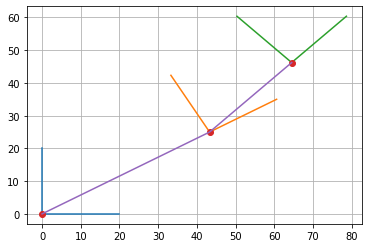

In [12]:
import matplotlib.pyplot as plt
p1=P3(0,0,0)
p2=P3(50,0,0)
p3=P3(30,0,0)
degree=[0,30,45]
o00=p1
o01=p1+Rz(-degree[1]).T*p2
print(o00)
print(o01)
o02=o01+Rz(-degree[2]).T*p3
print(o02)
x=[o00[0,0],o01[0,0],o02[0,0]]
y=[o00[1,0],o01[1,0],o02[1,0]]
a=20
for i,j,k in zip(x,y,degree):
    list1=[[],[]]
    list1[0].append(i+cos(90+k)*a)
    list1[1].append(j+sin(90+k)*a)
    list1[0].append(i)
    list1[1].append(j)
    list1[0].append(i+cos(0+k)*a)
    list1[1].append(j+sin(0+k)*a)
    # print(list1[0],list1[1])
    plt.plot(list1[0],list1[1])
plt.grid(True)
plt.plot(x, y,'o')
plt.plot(x, y)
plt.show()
